In [1]:
from __future__ import print_function, division
import numpy as np
import sympy
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Computational Mathematics I, Project 1

# Author: Foivos Lampadaridis Kokkinakis

## Objective: Use three numerical methods, bisection, the false position method, and fixed-point iteration to find the root of the equation $e^x + x − 2 = 0.$

## Introduction

__In this project we will attempt to solve the same equation with three different numerical methods. We will describe how they work, the choices we made to implement them, show our results (with graphs where they're needed), and finally compare them on: 1) the results they found 2) how many iterations it took, 3) how do the errors change with each iteration, 4) the rate of convergence and 5) the ease of use. All of the above will be better understood in the rest of this project.__

Everyone learns how to solve simplistic equations in their younger life where they just solve for x and they compute the result on the other side of the equation. This is called the analytical root of the equation and the result we get is precise and right. However, we're not always as lucky, because sometimes equations are too complicated to find the analytical solution (solve for $x$). So, what would one do if they needed to solve an equation that doesn't have an analytical solution?

Thankfully mathematicians have managed to produce certain computational methods that can give us an approximation of the root we're looking for, with a certain precision. These methods are called numerical because they produce a numerical value when they're applied. In this project, we'll use 3 numerical methods to compute the root of $f(x)=e^x+x-2=0$, the bisection, the false position method, and fixed-point iteration. Our goal is not only to apply these methods but to compare them, and study when and how quickly they converge.

To begin applying one of these methods, we must make one or two initial guesses (depending on the method) for the root of the equation $f(x)=0$. Then using our initial guesses, we apply the formula of each method to get the next best guess of our root. We keep applying that formula until a criterion is met and we are satisfied with our result. We say that a method converges when the results are getting closer and closer to the real root of our equation (hopefully). In other words, as we repeat the method the precision of our guess increases, or we could say that the error decreases. The precision we need depends on the problem we're trying to solve.

Numerical methods for finding the root of an equation are split into two groups based on how many initial guesses one must make to implement them. The 1st group is that of the __bracketing methods__. As the name suggests the idea is that we choose __two initial guesses__ ($x_1$ and $x_2$) on either side of the root, 'trapping' it in the middle. Then depending on the method, using the two initial guesses we get the next best guess ($x_3$). We then check if the root is in between the 1st initial guess $x_1$ and the new guess $x_3$ or the 2nd initial guess $x_2$ and the new guess $x_3$, so we can trap the root again. Then the method is repeated trapping the real root in a smaller and smaller space thus increasing our precision and dropping our error. __Both the bisection method and the false position method belong in the group of bracketing methods__.

__Note:__ The condition we must check to know that the root is in between $x_a$ and $x_b$ is the condition $f(x_a)f(x_b)<0$, since either side of the root the sign of function $f(x)$ changes. We must be careful before we use this condition because it can be misleading. This condition can be met without a root of $f(x)$ existing, for example, if $f(x)$ is discontinuous. __What we just stated reminds us of the Boltzano theorem which ensures that there's at least one root in $[x_a,x_b]$ if $f(x)$ is continuous in that space. Due to the Bolzano theorem, it becomes apparent that if the function $f(x)$ is continuous in $[x_a,x_b]$ and it's not tangent to the x-axis__ (there are not two or more roots in $[x_a,x_b]$) __bracketing methods always converge! This is why it's a good practice to plot our function $f(x)$ before using any numerical method. This way we can see these kinds of problems that may arise, and on top of that, the plot helps us choose some good initial guesses, so the method converges quickly (in a small number of iterations).__

The 2nd group is that of the __open methods__. This time we just chose __one initial guess__ ($x_1$) close to the actual root of the equation $f(x)=0$. Then using our guess and applying the formula that our open method gives us again and again we get closer to the actual root of the equation, dropping our error until we're satisfied. __The fixed-point interaction is an open numerical method.__ __Note: It's important to know that open methods don't always converge.__

One final thing we must talk about before we get started is __errors__. Here we will only work with percentage errors that are usually represented by $\epsilon$. We will mainly use two errors. Because we are making approximations, __the first error we will work with is the approximate percentage error__ that's given by the formula: $$\epsilon_a=\left|\dfrac{x_{n}-x_{n-1}}{x_{n}}\right|100\%$$
where $x_{n}$ is our current approximation, while $x_{n-1}$ is the approximation we got in our previous iteration. We can see that to compute $\epsilon_a$ we need at least two iterations, that way we have two approximations. The importance of $\epsilon_a$ becomes clear if we consider the __Scarborough Formula__: __If we want our result to have precision to up to $n$ significant figures, then we should repeat the method until:__ $$\left|\epsilon_a\right|<\epsilon_s \text{ where } \epsilon_s=0.5\times10^{2-n}$$
This way not only does $\epsilon_a$ show us how the method converges (if it does), but exactly when we should stop applying it!

__The second error we will work with, is the total percentage error__ that's given by the formula: $$\epsilon_t=\left|\dfrac{r-x_{n}}{r}\right|100\%$$
where $r$ is the exact root of our equation and $x_{n}$ is our current approximation of it. In other words, to calculate $e_t$ we must know the exact root of our equation. Since in this instance we don't, we'll calculate $e_t$ assuming that the exact root is the answer we got from each of the methods we used.

## Methodology

### __1) Bisection method__

As we've mentioned before the bisection method is a bracketing method, meaning that we have to make two initial guesses one lower than the root $x_l$ and one after the root $x_u$. The bisection method formula is the following: $$\boxed{x_n=\dfrac{x_{u}-x_{l}}{2}}$$ where $x_n$ is the newest result and $x_{u},x_{l}$ is the upper and lower limit of the space in which the root is potentially located. The formula of the bisection method tells us that the next best approximation of our root is exactly the middle of the space between our two previous ones $x_{u},x_{l}$. __That way, the possible space between our best approximation and the root gets cut in half with every iteration! It's very easy to prove that if the approximate percentage error in iteration n is: $\epsilon_{an}$, in the next iteration it will be: $\epsilon_{an+1}=\frac{\epsilon_{an}}{2}$ We expect our approximate error to be cut in half after each iteration.__

After $x_n$ is calculated we must check if the quantity $f(x_l)*f(x_n)$ is larger or smaller than 0. If $f(x_l)*f(x_n)<0$, that means that the root is in between $x_l$ and $x_n$ (for the reasons stated above) so $x_n$ replaces $x_u$ since it's the upper limit, and we apply the method again. On the other hand, if $f(x_l)*f(x_n)>0$, that means that the root is in between $x_n$ and $x_u$, so $x_n$ replaces $x_l$ since it's the lower limit, and we apply the method again. __As we've noted before because of the Boltzano Theorem, the Bisection method is expected to always converge to the root if $f(x)$ is continuous and as long as it's not tangent to the x-axis in $[x_l,x_u]$.__ To check this condition let's plot $f(x)$.

__Using all the formulas stated above we can reach an easier-to-use formula for bisection’s method approximate percentage error, which we're going to use during our calculations and it’s the following:__

$$\epsilon_a=\left|\dfrac{x_u-x_l}{x_u+x_l}\right|100\%$$

First off we must define $f(x)$ so we can perform computations with it. In our problem $f(x)=e^{-x}+x-2$:

In [2]:
def f(x):
    return np.exp(x)+x-2

We then create a list of 500 equally spaced points in between -1 and 1 and we call it xpoints. Then we compute the values of $f(x)$ for each point in xpoints and we save them in a list called fpoints. Finally, we plot xpoints and fpoints. That way we've created a plot of $f(x)$ at $[-1,1]$

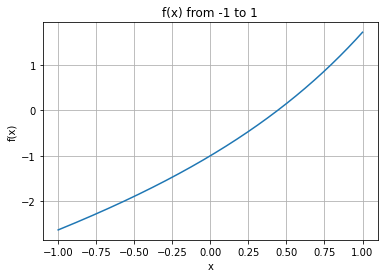

In [3]:
xpoints = np.linspace(-1,1,500) 
fpoints = f(xpoints)

plot1 = plt.plot(xpoints, fpoints)
plt.title('f(x) from -1 to 1')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True) #We choose to show the grid because it makes it easier to see the whereabouts of the root
plt.show(plot1)

__The point where $f(x)$ touches the x-axis is the root we are looking for.__ We can see from our plot that $f(x)$ is behaving correctly near the root so the __bisection method will converge__. Because of this, we can go on with applying the method.

Our first step is to make two initial guesses that are on either side of the root. From our plot, we can see that the root is in between $x=0.25$ and $x=0.5$. These would be my guesses if I just wanted to solve the problem in the fewest number of iterations possible. __However, because we are trying to show how these methods converge we should have more iterations. That way we can get the bigger picture. That's why I chose my two initial guesses to be $x_l=-0.5$ and $x_u=1$__.

In [4]:
xl=-0.5
xu=1

Next, we'll need to decide on how many significant figures of precision $n$ we want our result to have. I went with 10 here, so we'll need plenty of iterations to reach the necessary precision.

In [5]:
n=10

Lastly, I chose to define a new function called bisection, which keeps applying the bisection method until either we reach the desired precision, or we cross the max amount of iterations the user allowed. The bisection function will return:

__1)__ The root with the number of significant figures of precision the user asked.

__2)__ The number of iterations it took.

__3)__ A list with all the approximations that were calculated during the iterations.

__4)__ A list with the approximate percentage error calculated in each iteration.

__5)__ A list with the true percentage error calculated in each iteration, assuming that the true root of the equation is the result that's returned a.k.a the last approximation that was made.

This way if I ever need to apply the bisection method again I’ll just need to call this function.

In [6]:
#Our function takes 5 variables:
#1) equation: is some pre-defined function from the user where they're looking for the root of equation=0
#2),3) xu is the upper bound the user chose while xl is the lower bound
#4) n is the number of figures significant figures the user wants. After our function has found a result that matches the precision the iteration stops
#5) max_count is the upper limit of iterations that are going to be performed. This is more of a safety measure in case the user makes a mistake or something goes wrong

def bicection(equation,xu,xl,n,max_count):
    
    #The Scarborough Formula. We use it to compute the limit of the percentage approximate error we require to reach the precision that the user asked for
    es=0.5*10**(2-n)
    
    x_new_result=[] #This is where the approximations of the root will be saved
    
    ea_results=[]# This is where the approximate percentage error will be saved in each iteration
    
    ea=100 #The normalization of the approximate percentage error so the method can begin.
    
    et_results=[] # This is where the total percentage error will be saved in each iteration
    
    count=0 #The count of the iteration we're on is normalized at 0
    while abs(ea)>es and count<max_count: #While our approximate error is lower than what's given by the Scarborough Formula (the necessary precision isn't reached)
        #and while we are under the maximum number of iterations, the method is applied.
    
        count=count+1 #We are in the next iteration
    
        xn=(xl+xu)/2 # xn: The new best approximation is calculated from the bisection method formula
        x_new_result.append(xn) #The best new approximation is saved in the proper list
    
        if equation(xl)*equation(xn)<0: #If this product is negative that means that the root is in between xl and xn
            xu=xn #Then xn takes the place of the upper limit 
        
        elif equation(xl)*equation(xn)>0:#If this product is positive that means that the root is in between xn and xu
            xl=xn ##Then xn takes the place of the lower limit 
                
        else: #Else (eq(xl)*eq(xn)=0) means that eq(xn)=0 so xn is the root.
            ea=0 #If we found the root the approximate percentage error is 0
            
            ea_results.append(ea) #We save it in the proper list
            break #And we stop applying the method

        ea=100*abs((xu-xl)/(xu+xl)) #If the root hasn't been found, we calculate the new value of the approximate percentage error
        ea_results.append(ea) # #We save it in the proper list
    

    number_of_iterations=len(x_new_result) #After we either have found the root with n significant figures or the max number of iterations max_count is reached, 
    #we calculate the number of iterations that were done.
    result=x_new_result[number_of_iterations-1] #We save the result,(final item of the x_new_result list) is the root variable
    
    for i in range(0,number_of_iterations): #For every iteration
        et=abs(100*(result-x_new_result[i])/result) #Apply the formula of the total percentage error, assuming that the result we calculated is the actual root.
        et_results.append(et) #We save it in the proper list.
        
    if count==max_count: #If the maximum number of iterations was reached
        print("Warning!!! the maximum amount of iterations has been reached! The result isn't as presice as you've asked!") #Print a warning message to the user
    
    return result,number_of_iterations,x_new_result,ea_results,et_results #We return
    #1)the root with the number of significant figures the user asked. 
    #2) The number of iterations it took.
    #3) a list with all the approximations that were calculated during the iterations.
    #4) a list with the approximate percentage error calculated in each iteration.
    #5) a list with the true percentage error calculated in each iteration.


Since we have our function we will use it in our specific problem. Our equation here is f, our upper and lower bounds have been saved earlier and they are named xu=1 and xl=-0.5, the number of precision figures we require is n=10 and the maximum number of iterations we allow is set to 10,000.

We must save all its outputs in the proper variables:

__1)__ result_bice= The root with the number of significant figures of precision I asked for (n)

__2)__ number_of_iterations_bice =The number of iterations it took

__3)__ x_new_result_bice= A list with all the approximations that were calculated during the iterations

__4)__ ea_results_bice= A list with the approximate percentage error calculated in each iteration

__5)__ et_results_bice= A list with the true percentage error calculated in each iteration, assuming that the true root of the equation is the result that's returned a.k.a the last approximation that was made

All of this is done in the line of code below:

In [7]:
result_bice,number_of_iterations_bice,x_new_result_bice,ea_results_bice,et_results_bice=bicection(f,xu,xl,n,10000)

We will analyze our results on the bisection method and comment on them in another section of this report.

### __2) The False Position Method__

In our use of the bisection method, we noticed that the next best guess is always given to us by cutting the space between our two guesses in half. While that is okay, using the bisection method we don't consider which of our two guesses is closer to the actual root. If somehow we managed to find a method that took that into account, you can imagine how we would need fewer iterations to reach the same precision. This is exactly what the False Position Method attempts to do.

Let's assume we're trying to find the root of an equation $h(x)=0$. Because the false position method is a bracketing method, we must make two initial guesses $x_l$ and $x_u$. This is where the two methods become different from one another. __In the false position method, we focus on the two points of the x-y plain $(x_l,h(x_l))$ and $(x_u,h(x_u))$. Those two points are connected by a line. The next best approximation $x_n$ we get is the point where this line intercepts the x-axis.__ Solving the problem geometrically we find that $x_n$ is given by:

$$\boxed{x_n=x_u-\dfrac{h(x_u)(x_l-x_u)}{h(x_l)-h(x_u)}}$$

After the next best approximation is calculated the steps are like that of the bisection method: We check the sign of $h(x_l)h(x_n)$ to see which of the two bounds $x_n$ will replace. After that, the method is repeated until the criterion of the Scarborough formula is met. __Note: Since the False Position Method is a bracketing method, it's expected to always converge to the root if $h(x)$ is continuous and as long as it's not tangent to the x-axis in $[x_l,x_u]$.__ In other words it's going to converge in our specific problem. The question is it going to be faster than the bisection method?

__Theoretically the false position method is indeed faster than the bisection method.__ If $r$ is the exact root of our equation and $x_{n+1}$ is our approximation in the (n+1)th iteration of the false position method, then we can prove that our error in (n+1)th iteration will be $\epsilon_{n+1}=|r-x_{n+1}|=k\epsilon_{n}^{1.618}$, where $k$ is a constant. __Considering that the bisection method converges linearly and that the exponent of the previous equation is bigger than 1, it becomes clear why the false position method is expected to converge faster.__

__Here is where this method’s problem becomes noticeable__. If we apply the False Position method trying to solve an equation $h(x)=0$, where $h(x)$ is a steep function in one end of the root and not so steep in the other, the method will keep replacing only the boundary that's on the non-steep part. That means that one of our initial guesses will remain after some iterations. __That's why we say that the false position method is one-sided__. Under these conditions we see the False Position Method converging very slowly, even slower than the bisection method! 

Luckily for us, there's a fix to this problem. __Let’s assume that $x_n$ keeps replacing the lower bound $x_l$ repeatedly. One simple solution is for us to keep certain counters that tell us how many iterations it has been since a boundary has been changed $i_l$ and $i_u$. If a boundary hasn't been changed for 2 or more iterations in a row (in this example this would be the higher bound, so $i_u \geq 2$), we must do change something to move the method forward. Here we will choose to change the value of of $h(x_u)=\dfrac{h(x_u)}{2}$,__ which will be used in the next iteration. What we've done here geometrically speaking, is that we changed the $y$ component of the point which refuses to change. This way the slope of our straight line will be different, and our method will become 'unstuck'.


To apply the False Point Method, we first must make two initial guesses $x_l$ and $x_u$. Our two first guesses here will be the same as those used in the bisection method ($x_l=-0.5$ and $x_u=1$), so we can make a better comparison between the two methods. The same applies to the number of significant figures of precision we require our result to have ($n=10$).

__Lastly I chose to define a new function called false_position_method, which keeps applying the false position method (including the fix that was discussed earlier), until either we reach the desired precision, or we cross the maximum amount of iterations the user has allowed. The false_point_iteration function will return:__

__1)__ The root with the number of significant figures of precision the user asked.

__2)__ The number of iterations it took.

__3)__ A list with all the approximations that were calculated during the iterations.

__4)__ A list with the approximate percentage error calculated in each iteration.

__5)__ A list with the true percentage error calculated in each iteration, assuming that the true root of the equation is the result that's returned a.k.a the last approximation that was made.

__6)__ A list with the iterations at which the fix was applied.

This way if I ever need to apply the false position method again I'll just need to call this function.

In [8]:
#Our function takes 5 variables:
#1) equation: is some pre-defined function from the user. They're looking for the root of equation=0
#2),3) xu is the upper bound the user chose while xl is the lower bound.
#4) n is the number of figures significant figures the user wants. After our function has found a result that matches the precision the iteration stops
#5) max_count is the upper limit of iterations that are going to be performed. This is more of a safety measure in case the user makes a mistake, or something goes wrong
def false_position_method(equation,xu,xl,n,max_count):
    
    es=0.5*10**(2-n)#The Scarborough Formula. We use it to compute the limit of the percentage approximate error we require to reach the precision that the user asked for
    
    x_new_result=[] #This is where the approximations of the root will be saved
    
    ea_results=[]# This is where the approximate percentage error will be saved in each iteration
    
    ea=100 #The normalization of the approximate percentage error so the method can begin.
    
    et_results=[] # This is where the total percentage error will be saved in each iteration
    
    fixed_iteration=[] #This is where the number of the iteration at which the fix is applied will be saved
    
    xn=xu # The normalization of xn that will hold the current value of our approxiamation
    
    equ=equation(xu) #We save equation(xu) as equ to make computations easier
    eql=equation(xl) #We save equation(xl) as eql to make computations easier
    count=0 #The count of the iteration we're on is normalized at 0
    il=0 #The count of how many iterations it's been since xn took the lower bound position normalized at 0
    iu=0 #The count of how many iterations it's been since xn took the upper bound position normalized at 0
    
    while abs(ea)>es and count<max_count:#While our approximate error is lower than what is given by the Scarborough Formula (the necessary precision isn't reached)
        #and while we are under the maximum number of iterations, the method is applied.
    
        count=count+1 #We are in the next iteration
        
        xold=xn #The old approxiamation is saved before the new one is calculated
        
        xn=xu-((equ*(xl-xu))/(eql-equ)) # xn: The best new approximation is calculated from the false point iteration method formula
        x_new_result.append(xn) #The best new approximation is saved in the proper list.
        eqn=equation(xn) # The value of equation(xn) is saved in eqn
       
    
        if eql*eqn<0:#If this product is negative that means that the root is in between xl and xn
            xu=xn #Then xn takes the place of the upper limit 
            equ=equation(xu) # equation(xu) changes since xu changed
            
            il=il+1 #It's been one more iteration where xn hasn't taken the lower bound
            iu=0 # xn took the upper bound so it's been 0 iterations
            
            if il>=2: #if xn takes the upper bound two or more times in a row then we apply the fix
                fixed_iteration.append(count+1) #The iteration where the fix is applied is saved in the proper list.
                eql=eql/2 #Here's the Fix. The value of eql gets halved for the next iteration since it hasn't changed in some time.
        
        
        elif eql*eqn>0: #If this product is positive that means that the root is in between xn and xu
            xl=xn #Then xn takes the place of the lower limit 
            eql=equation(xl) # equation(xl) changes since xl changed 
            
            iu=iu+1 #It's been one more iteration where xn hasn't taken the upper bound
            il=0 # xn took the lower bound so it's been 0 iterations
            
            if iu>=2: #if xn takes the lower bound two or more times in a row then we apply the fix
                fixed_iteration.append(count+1) #The iteration where the fix is applied is saved in the proper list.
                equ=equ/2 #Here's the Fix. The value of equ gets halved for the next iteration since it hasn't changed in some time.

        else: #Else (eq(xl)*eq(xn)=0) means that eq(xn)=0 so our job so xn is the root.
            ea=0 #If we found the root the approximate percentage error is 0
            ea_results.append(ea) #We save it in the proper list.
            break #And we stop applying the method.

    
        ea=100*abs((xold-xn)/xn) #If the root hasn't been found, we calculate the new value of the approximate percentage error
        ea_results.append(ea)  # #We save it in the proper list.

    number_of_iterations=len(x_new_result) #After we either have found the root with n significant figures or the max number of iterations max_count is reached,
    #we calculate the number of iterations that were done
    
    result=x_new_result[number_of_iterations-1] #We save the result,(final item of the x_new_result list) is the root variable
    
    for i in range(0,number_of_iterations): #For every iteration
        et=abs(100*(result-x_new_result[i])/result) #Apply the formula of the total percentage error, assuming that the result we calculated is the actual root.
        et_results.append(et) #We save it in the proper list.
        
    if count==max_count: #If the max amount of iteration was reached
        print("Warning!!! the maximum number of iterations has been reached! The result isn't as precise as you've asked!") #Print a warning message to the user
    
    return result,number_of_iterations,x_new_result,ea_results,et_results,fixed_iteration #We return:
    #1)the root with the number of significant figures the user asked. 
    #2) the number of iterations it took.
    #3) a list with all the approximations that were calculated during the iterations.
    #4) a list with the approximate percentage error calculated in each iteration.
    #5) a list with the true percentage error calculated in each iteration.
    #6) A list of the iterations in which the fix was applied.

Since we have our function we will use it in our specific problem. Our equation here is f, our upper and lower bounds have been saved earlier and they are named xu=1 and xl=-0.5, the number of precision figures we require is n=10 and the maximum number of iterations we allow is set to 10,000. 

Using the False Position Method, we must save all of its outputs in the proper variables:

__1)__ result_fpm= The root with the number of significant figures of precision I asked for (n)

__2)__ number_of_iterations_fpm =The number of iterations it took

__3)__ x_new_result_fpm= A list with all the approximations that were calculated during the iterations

__4)__ ea_results_fpm= A list with the approximate percentage error calculated in each iteration

__5)__ et_results_fpm= A list with the true percentage error calculated in each iteration, assuming that the true root of the equation is the result that's returned a.k.a the last approximation that was made

__6)__ fixed_iteration_fpm= A list with the iterations at which the fix was applied

All of this is done in the line of code below:

In [9]:
result_fpm, number_of_iterations_fpm, x_new_result_fpm, ea_results_fpm, et_results_fpm, fixed_iteration_fpm=false_position_method(f,xu,xl,n,10000)

We will analyze our results on the false position method and comment on them in another section of this report.

### __3) Fixed-point iteration__ 

Contrary to the two previous methods, fixed point iteration belongs to the group of open methods. The concept of this method is quite simple. Let's assume that we are looking for the root of the equation $h(x)=0$. Doing some algebra, we can bring our equation in a form that looks like: $x=g(x)$. Since the fixed-point iteration is an open method, we just have to make one initial guess $x_i$. Then it's quite easy to compute $g(x_i)$. The next approximation will be given from:

$$\boxed{x_{i+1}=g(x_i)}$$

__It's clear that since the fixed-point iteration is an open method it's not going to always converge. The convergence criterion is that around the area of interest, it must be true that:__ 

$$\boxed{\left|g'(x)\right|<1}$$

Depending on the equation we have, we can find a lot of different functions $g(x)$. We have to choose one that follows the criterion of convergence if we want to use the fixed-point iteration. __One final note is that the total percentage error from one iteration to the next drops linearly with a slope $\left|g'(ξ)\right|$, where $ξ$ is a point inside the space $(x_i,x_{i+1})$. If the total percentage error in iteration n is: $\epsilon_{tn}$, in the next iteration it will be: $\epsilon_{tn+1}=\left|g'(ξ)\right|\epsilon_{tn}$. So, the smaller the absolute value of the derivative of the $g(x)$ that we chose, the faster the method will converge.__

First off let's make our initial guess. __I opted for xi=-0.5 because it's one of the two initial guesses we used in the two previous methods. This way the comparisons will be more justified.__

In [10]:
xi=-0.5

Now let's try to find $g(x)$. If we solve the equation $f(x)=e^x-x+2=0$ for the $x$ that isn't in the exponent we get: $$x=g_1(x)=2-e^x$$
Let's define $g_1(x)$ so we can make some computations with it:

In [11]:
def g1(x):
    return 2 - np.exp(x)

Before applying the fixed-point iteration method, we have to make sure that $g_1(x)$ meets the convergence criteria. For that we define $g'_1(x)=-e^x$ as dotg1.

In [12]:
def dotg1(x):
    return -np.exp(x)

As we've stated before for the fixed-point iteration method to converge it must be true that: $\left|g'_1(x)\right|<1$ in the area around our root. To check this condition, we plot $|g'_1(x)|$.

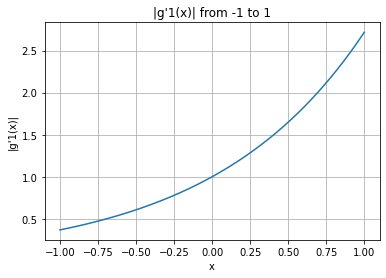

In [13]:
dotg1points=dotg1(xpoints)
plot2 = plt.plot(xpoints, abs(dotg1points))
plt.title("|g'1(x)| from -1 to 1")
plt.xlabel('x')
plt.ylabel("|g'1(x)|")
plt.grid()
plt.show(plot2)

As we've stated in the beginning, we know that our root is within $x=[0.25,0.5]$. __We can see from the plot that, while for $x$ around the initial guess xi=-0.5 the criterion is met, but that's not the case as we get close to the root since there we have:$|g'_1(x)>1|$. This means that our choice of $g(x)$ isn't going to allow the fixed-point iteration to converge. So, we must look for another $g(x)$.__

Now lets try to find another $g(x)$. If we solve the equation $f(x)=e^x-x+2=0$ for the $x$ that is in the exponend we get: $$x=g_2(x)=ln(2-x)$$
Let's define $g_2(x)$ so we can make some computations with it:

In [14]:
def g2(x):
    return np.log(2-x)

Before applying the fixed-point iteration method, we have to make sure that $g_2(x)$ meets the convergence criteria. For that we define $g'_2(x)=-\frac{1}{2-x}$ as dotg2.

In [15]:
def dotg2(x):
    return -1/(2-x)

As we've stated before for the fixed-point iteration method to converge it must be true that: $\left|g'_2(x)\right|<1$ in the area around our root. To check this condition, we plot $|g'_2(x)|$.

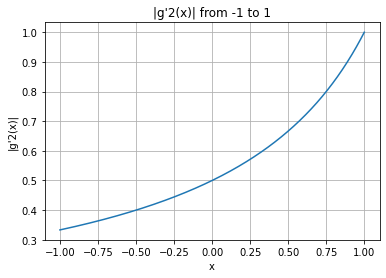

In [16]:
dotg2points=dotg2(xpoints)
plot3 = plt.plot(xpoints, abs(dotg2points))
plt.title("|g'2(x)| from -1 to 1")
plt.xlabel('x')
plt.ylabel("|g'2(x)|")
plt.grid()
plt.show(plot3)

As we've stated in the beginning, we know that our root is within $x=[0.25,0.5]$. __We can see from the plot that for $x$ around the initial guess xi=-0.5, and around the root, the criterion is met, since there we have:$|g'_2(x)<1|$. The only problem that arises is that $|g'_2(x=1)=1|$. We decide that our initial guess should be still xi=-0.5 since it is far away from $x=1$ and thus, safe. This means that our choice of $g(x)$ is going to allow the fixed-point iteration to converge. So, we stop looking and we use $g_2(x)$.__

__This is why we will use $g(x)=g_2(x)=ln(2-x)$ to apply the fixed-point iteration method.__

__Lastly I chose to define a new function called fixed_point_iteration, which keeps applying the fixed-point iteration method (all the steps that were described previously), until either we reach the desired precision or we cross the maximum amount of iterations the user has allowed. The false_point_iteration function will return:__

__1)__ The root with the number of significant figures of precision the user asked.

__2)__ The number of iterations it took.

__3)__ A list with all the approximations that were calculated during the iterations.

__4)__ A list with the approximate percentage error calculated in each iteration.

__5)__ A list with the true percentage error calculated in each iteration, assuming that the true root of the equation is the result that's returned a.k.a the last approximation that was made.

This way if I ever need to apply the fixed-point iteration method again, after finding the proper $x=g(x)$ that meets the convergence criterion, I'll just need to call this function.

In [17]:
#Our function takes 5 variables:
#1) equation!!!: This is the g(x) function that the user found independently.
#2) xi is the initial guess the user made.
#3) n is the number of figures significant figures the user wants. After our function has found a result that matches the precision the iteration stops
#4) max_count is the upper limit of iterations that are going to be performed. This is more of a safety measure in case the user makes a mistake, or something goes wrong.
def fixed_point_interation(equation,xi,n,max_count):
    
    #The Scarborough Formula. We use it to compute the limit of the percentage approximate error we require to reach the precision that the user asked for.
    es=0.5*10**(2-n)
    
    x_new_result=[] #This is where the approximations of the root will be saved
    
    ea_results=[]# This is where the approximate percentage error will be saved in each iteration
    
    ea=100 #The normalization of the approximate percentage error so the method can begin.
    
    et_results=[] # This is where the total percentage error will be saved in each iteration
    
    count=0 #The count of the iteration we're on is normalized at 0
    while abs(ea)>es and count<max_count: #While our approximate error is lower than what is given by the Scarborough Formula (the necessary precision isn't reached)
        #and while we are under the maximum number of iterations, the method is applied.
    
        count=count+1 #We are in the next iteration
    
        xn=equation(xi)# xn: The best new approximation is calculated from the fixed-point iteration method formula
        x_new_result.append(xn) #The best new approximation is saved in the proper list.
    
        ea=100*abs((xi-xn)/xn)#We calculate the new value of the approximate percentage error
        ea_results.append(ea) # #We save it in the proper list.
    
        xi=xn #The best new approximation becomes the old one and the method is repeated
    

    number_of_iterations=len(x_new_result)#After we either have found the root with n significant figures or the max number of iterations max_count is reached,
    #we calculate the number of iterations that were done
    result=x_new_result[number_of_iterations-1] #We save the result,(final item of the x_new_result list) is the root variable
    
    for i in range(0,number_of_iterations): #For every iteration
        et=abs(100*(result-x_new_result[i])/result) #Apply the formula of the total percentage error if the result we calculated is the actual root.
        et_results.append(et) #We save it in the proper list.
        
    if count==max_count: #If the max amount of iteration was reached
        print("Warning!!! the maximum number of iterations has been reached! The result isn't as precise as you've asked!") #Print a warning message to the user
    
    return result,number_of_iterations,x_new_result,ea_results,et_results #We return:
    #1)the root with the number of significant figures the user asked. 
    #2) the number of iterations it took.
    #3) a list with all the approximations that were calculated during the iterations.
    #4) a list with the approximate percentage error calculated in each iteration.
    #5) a list with the true percentage error calculated in each iteration.

Since we have our function we will use it in our specific problem. Our $g(x)$ is g2, the initial guess has been saved earlier and it was named xi=-0.5, the number of precision figures we require is n=10 and the maximum number of iterations we allow is set to 10,000. 

Using the Fixed-Point Iteration, we must save all its outputs in the proper variables:

__1)__ result_fpi= The root with the number of significant figures of precision I asked for (n)

__2)__ number_of_iterations_fpi =The number of iterations it took

__3)__ x_new_result_fpi= A list with all the approximations that were calculated during the iterations

__4)__ ea_results_fpi= A list with the approximate percentage error calculated in each iteration

__5)__ et_results_fpi= A list with the true percentage error calculated in each iteration, assuming that the true root of the equation is the result that's returned a.k.a the last approximation that was made

All of this is done in the line of code below:

In [18]:
result_fpi, number_of_iterations_fpi, x_new_result_fpi, ea_results_fpi, et_results_fpi=fixed_point_interation(g2,xi,n,10000)

We will analyze our results on the fixed-point iteration method and comment on them in another section of this report.

## Results

__First off we will present the roots we got from each method and the number of iterations it took__. To do that we will print the appropriate messages.

In [19]:
print("The root of the given equation with certainty up to",n,"significant figures, using the fixed point iteration, is given after \n",number_of_iterations_bice, "iterations and it is: x =",result_bice)

The root of the given equation with certainty up to 10 significant figures, using the fixed point iteration, is given after 
 35 iterations and it is: x = 0.442854401000659


In [20]:
print("The root of the given equation with certainty up to",n,"significant figures, using the false position method, is given after \n",number_of_iterations_fpm, "iterations and it is: x =",result_fpm)

The root of the given equation with certainty up to 10 significant figures, using the false position method, is given after 
 8 iterations and it is: x = 0.44285440100238865


In [21]:
print("The root of the given equation with certainty up to",n,"significant figures, using the Fixed-Point interation, is given after \n",number_of_iterations_fpi, "iterations and it is: x =",result_fpm)

The root of the given equation with certainty up to 10 significant figures, using the Fixed-Point interation, is given after 
 58 iterations and it is: x = 0.44285440100238865


__Then it's a good idea to show how each method converges. To do so we will plot the approximate percentage error and the total percentage error of each method with respect to the iteration it was calculated for!__ So we must first create a list for each method, in which we save a natural number up to how many iterations were performed. We achieve this with the following code:

In [22]:
iteration_space_bice=np.linspace(1,number_of_iterations_bice,number_of_iterations_bice) #the iterations of the bicection method
iteration_space_fpm=np.linspace(1,number_of_iterations_fpm,number_of_iterations_fpm) # the iterations of the False Position method
iteration_space_fpi=np.linspace(1,number_of_iterations_fpi,number_of_iterations_fpi) #the iterations of the Fixed_Point Iteration method

To create the proper plots, we use the ea_results lists for the approximate percentage result curves and the et_results lists for the total percentage error curves. The graphs have their y-axis (percentage error axis) in the logarithmic scale, to make the results easier to read. __An important note is that the total error curves are not needed to show how exactly each method converges, nor are they exact since the result we got is not an exact replica of the actual root. They're there more for cosmetic purposes and for us to comment on how they look at a later stage__.

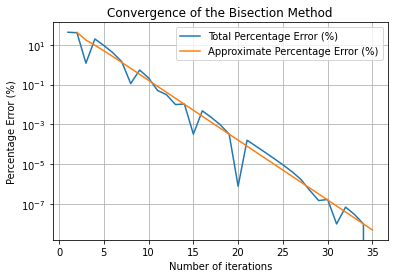

In [23]:
# Bisection method
fig, ax = plt.subplots()
ax.plot(iteration_space_bice,et_results_bice,label='Total Percentage Error (%)') #plotting the curve of the total error (%)
ax.plot(iteration_space_bice[1:], ea_results_bice[1:],label='Approximate Percentage Error (%)') #plotting the curve of the approximate error (%)
#Note: the approximate error makes sense only after two approximations.
ax.set(xlabel='Number of iterations', ylabel='Percentage Error (%)') #Labels of axis
ax.set_yscale('log') #Log scale
ax.set_title('Convergence of the Bisection Method') #Title
ax.legend() #show legend
ax.grid()
plt.show()

In the case of the false position method we will also create a list called et_when_fix that will hold the value of the total percentage error, in the iteration which the fix was applied.

In [24]:
et_when_fix=[]
for i in fixed_iteration_fpm:
    et_when_fix.append(et_results_fpm[i-1])

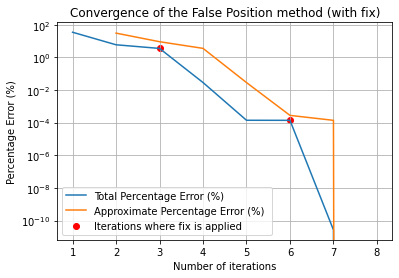

In [25]:
#False position method
fig, ax = plt.subplots()
ax.plot(iteration_space_fpm,et_results_fpm,label='Total Percentage Error (%) ') #plotting the curve of the total error (%)
ax.plot(iteration_space_fpm[1:], ea_results_fpm[1:],label='Approximate Percentage Error (%) ') #plotting the curve of the approximate error (%)
ax.scatter(fixed_iteration_fpm, et_when_fix, color='red', marker='o',label='Iterations where fix is applied') #plotting the moment the fix was applied
#Note: the approximate error makes sense only after two approximations.
ax.set(xlabel='Number of iterations', ylabel='Percentage Error (%)')#Labels of axis
ax.set_yscale('log') #Log scale
ax.set_title('Convergence of the False Position method (with fix)') #Title
ax.legend() #show legend
ax.grid()
plt.show()

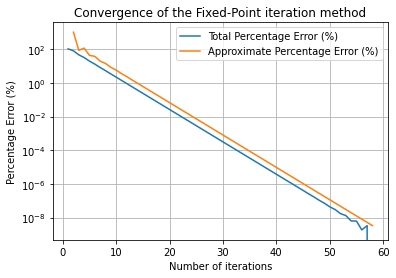

In [26]:
# The fixed-point Iteration method
fig, ax = plt.subplots()
ax.plot(iteration_space_fpi,et_results_fpi,label='Total Percentage Error (%)') #plotting the curve of the total error (%)
ax.plot(iteration_space_fpi[1:], ea_results_fpi[1:],label='Approximate Percentage Error (%)') #plotting the curve of the approximate error (%)
#Note: the approximate error makes sense only after two approximations.
ax.set(xlabel='Number of iterations', ylabel='Percentage Error (%)')#Labels of axis
ax.set_yscale('log') #Log scale
ax.set_title('Convergence of the Fixed-Point iteration method') #Title
ax.legend() #show legend
ax.grid()
plt.show()

__Finally, we create a graph to show how each method's convergence compares to each other.__ To do this we will plot each method's approximate percentage error curves.

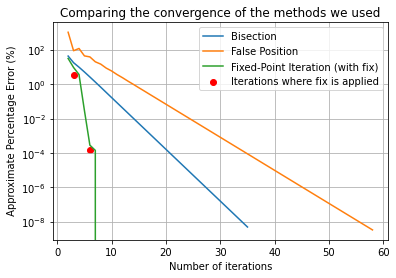

In [27]:
fig, ax = plt.subplots()
ax.plot(iteration_space_bice[1:], ea_results_bice[1:],label='Bisection') #plotting the curve of the approximate error (%) for the Bisection Method
ax.plot(iteration_space_fpi[1:], ea_results_fpi[1:],label='False Position')  #plotting the curve of the approximate error (%) for the
#False Position Method
ax.plot(iteration_space_fpm[1:], ea_results_fpm[1:],label='Fixed-Point Iteration (with fix)') #plotting the curve of the approximate error (%) for the
#Note: the approximate error makes sense only after two approximations.
ax.scatter(fixed_iteration_fpm, et_when_fix, color='red', marker='o',label='Iterations where fix is applied') #plotting the moment the fix was applied
ax.set(xlabel='Number of iterations', ylabel=' Approximate Percentage Error (%)')#Labels of axises
ax.set_yscale('log') #Log scale
ax.set_title('Comparing the convergence of the methods we used') #Title
ax.legend() #show legend
ax.grid()
plt.show()

## Discussion

Let's compare the methods we used.
## __1)__ 
 __First off if we have a look at the results we got, we can see that all 3 methods agree on the first 10 significant figures of their result. This speaks to the importance and usefulness of the Scarborough Formula, which allowed us to stop at the right number of iterations to get the correct answer. More specifically, the root of $f(x)=e^x+2-2=0$ up to 10 significant figures of precision according to all 3 of our methods is__:

$$\boxed{x=0.4428544010}$$

## 2) 

Next up __let's compare the number of iterations that each method needed to reach the same precision__.

If we focus on the printed statements, and we name the number of iterations of the bisection method, the false position method, and the fixed-point iteration needed, $n_B=35,n_{fpm}=8,n_{fpi}=58$, we can see that:

$$\boxed{n_{fpm}<n_B<n_{fpi}}$$
__In other words the False Position method needed the least amount of iterations (8) followed by the Bisection method (35) followed by the Fixed-Point iteration (58).__

## 3) 
__Next let's focus on the graphs titled "Convergence of the X method."__

Starting with the __bisection method__, both the total error percentage and the approximate error percentage curves look exactly as expected, where the first one has that characteristic ragged look to it and the second one looks smooth and straight in a semilog graph. The ragged look of the $\epsilon_t$ curve can be explained by the main idea of the method itself, in each iteration we cut a space in half. Since we don't take into consideration if the root is closer to one end of the space over the other when we are cutting that space in half, sometimes we'll move further away from the actual root, while at other times we will move closer. The nature of the straight line of $\epsilon_a$ is also expected by the nature of the method itself since the approximate error from one iteration to the next, is cut in half so we expect a linear relationship between the two with a slope of -0.5.

Moving on to the __false position__ graph we can see that with the fix we've managed to make the method converge fast. We expected the true percentage error ($\epsilon_t$) to fall linearly on a semilog graph, (since the shortcoming of the bisection method with the ragged curve, shouldn't exist and since the errors follow the $\epsilon^{1.618}$ power rule) but we see that that doesn't happen. This is because of our fix. We can see that at the points where we have those red dots (the fix was applied on that iteration), the curve hasn't become steeper. However, on the next iteration, the method seems to converge a lot faster. The same applies to the approximate percentage error curve ($\epsilon_a$). __It seems like even though the application of the fix may not have an immediate effect on the rate of convergence, it helps the method become unstuck in the long run.__

Lastly, on the __fixed-point iteration__ graph, we see that both curves seem to be falling linearly as expected, since similar to the bisection method, the true error from one iteration to the next is cut by $|g'_2(ξ)|<1$, so we expect a linear relationship between the two with a slope of $-|g'_2(ξ)|$.

## 4)
__Let's compare the rate of convergence of each method using the "'Comparing the convergence of the methods we used" graph.__

__As we can see the method that converges the slowest out of the 3 is the fixed-point iteration method__. That result is to be expected since we know that it's a method that converges linearly from iteration to iteration, with a slope of $-|g'_2(ξ)|$. We can see from the $|g_2(x)|$ graph that for the most part in the area around the root ($x\approx 0.5$) it’s true that$|g_2(x)|\approx 0.65>0.5$. What this tells us is that the approximate percentage error will be multiplied by a factor of $factor_{fpi}=|g_2(x)|\approx 0.65$ in each iteration and it will decrease. 

If we compare the fixed-point iteration method to the bisection method which is also a method that converges linearly from iteration to iteration, we will see that, __the bisection method is the 2nd slowest method__. If we remember that the approximate percentage error in the bisection method is multiplied by a factor of $factor_{bice}=0.5$ then we can easily explain our findings since:

$$factor_{bice}<factor_{fpi} \Rightarrow rate_{bice}>rate_{fpi}$$

__Lastly we see that the False Position method is by far the fastest one of the three.__ That's in big part because of the fix we applied to the method but we expected it to converge faster than the others regardless, because of the relation $\epsilon_{n+1}=k\epsilon_{n}^{1.618}$.

## 5) 
__Finally let's talk about the ease of use of each method__.

While this section is the most subjective one because what every person deems as easy or hard depends on their experience and the methods they're used to, __I believe that the easiest method to use is the bisection method__. I believe this to be true because to use it, one just must plot their $f(x)$ and see if there are any problems with it  (it's not continuous or tangent to the x-axis) and then make two initial guesses either side of the root. After that the method will do its thing and it will always converge to the root.

__I believe that the second easiest method to use is the False Position method__ because while it's supposed to converge quicker than the bisection method, that's not always the case. The reason behind this becomes clear once we remember that this method tends to be one-sided. This means that one must be a) aware of this shortcoming and b) implement a fix to use it safely. Once they've done that it's as easy to use as the bisection method.

Lastly, __I believe that the hardest method to use is the Fixed-Point Iteration method__. While it has a lot going for it a) the algorithm is the easiest to implement b) the concept of the method is fairly simple, and the convergence criterion makes everything more difficult. I believe this to be true because to make sure that the criterion holds, we must do algebraic calculations with $f(x)$, and even then, it's not guaranteed that we will find the right $g(x)$ so $ |g(ξ)|<1$. If we consider that it's not going to be significantly faster than the bisection method (in the best-case scenario, where $|g_2(ξ)|<0.5$), since both methods' errors decrease linearly, it's easy to see why it's the hardest one to use and that one wouldn't gain much from their efforts.

## Conclusion

In this report, we used three different numerical methods to find the root of the same equation. After implementing them we compared them based on their result, how long it took for them to converge how exactly they did it, and on the ease of use of each one. We saw that they all agreed to the significant figures of precision we demanded and that's thanks to the Scarborough formula. __We concluded that while the bisection method is the safest and easiest to implement out of the three, using the false position method (with the fix) is worth it because of its quick convergence. The same can’t be said for the fixed-point iteration method since we don’t really see the same gains for our trouble__

Some advice the reader of this report should remember before applying the methods i presented is: 

__1)__ Always plot your $f(x)$ before applying any of these methods. It gives you an idea about the whereabouts of the root and a good basis to make your initial guesses.

__2)__ Always apply the fix we discussed while using the false position method to get quick convergence and avoid the one-sidedness problem of the method.

__3)__ Before applying the fixed-point iteration method, make sure that there exists at least one $g(x)$ that meets the convergence criterion of the method although it's not recommended to implement it since you won't gain a lot for your trouble, if anything at all, compared to the other two methods.

## Extra

__In this unit of the project we will focus more on what happens when we don't use the fix we presented earlier on the false position method.__

Firstly, we will assume the same two initial guesses xl=-0.5 and xu=1 so we can make a fair comparison between there being a fix or not. Below I defined the function false_position_method_no_fix which is identical to the false_position_method function we defined earlier, excluding the fix.

In [28]:
#Our function takes 5 variables:
#1) equation: is some pre-defined function from the user. They're looking for the root of equation=0
#2),3) xu is the upper bound the user chose while xl is the lower bound.
#4) n is the number of figures significant figures the user wants. After our function has found a result that matches the precision the iteration stops
#5) max_count is the upper limit of iterations that are going to be performed. This is more of a safety measure in case the user makes a mistake, or something goes wrong.
def false_position_method_no_fix(equation,xu,xl,n,max_count):
    
    es=0.5*10**(2-n)#The Scarborough Formula. We use it to compute the limit of the percentage approximate error we require to reach the precision that the user asked for.
    
    x_new_result=[] #This is where the approximations of the root will be saved
    
    ea_results=[]# This is where the approximate percentage error will be saved in each iteration
    
    ea=100 #The normalization of the approximate percentage error so the method can begin.
    
    et_results=[] # This is where the total percentage error will be saved in each iteration
    
    fixed_iteration=[] #This is where the number of the iteration at which the fix is applied will be saved
    
    xn=xu
    
    equ=equation(xu) #We save equation(xu) as equ to make computations easier
    eql=equation(xl) #We save equation(xl) as eql to make computations easier
    count=0 #The count of the iteration we're on is normalized at 0
   
    while abs(ea)>es and count<max_count:#While our approximate error is lower than what is given by the Scarborough Formula (the necessary precision isn't reached)
        #and while we are under the maximum number of iterations, the method is applied.
    
        count=count+1 #We are in the next iteration
        
        xold=xn
        
        xn=xu-((equ*(xl-xu))/(eql-equ)) # xn: The best new approximation is calculated from the false point iteration method formula
        x_new_result.append(xn) #The best new approximation is saved in the proper list.
        eqn=equation(xn) # The value of equation(xn) is saved in eqn
       
    
        if eql*eqn<0:#If this product is negative that means that the root is in between xl and xn
            xu=xn #Then xn takes the place of the upper limit 
            equ=equation(xu) # equation(xu) changes since xu changed
            
        
        elif eql*eqn>0: #If this product is positive that means that the root is in between xn and xu.
            xl=xn #Then xn takes the place of the lower limit 
            eql=equation(xl) # equation(xl) changes since xl changed 
            
          
        else: #Else (eq(xl)*eq(xn)=0) means that eq(xn)=0 so our job so xn is the root.
            ea=0 #If we found the root the approximate percentage error is 0
            ea_results.append(ea) #We save it in the proper list.
            break #And we stop applying the method.

    
        ea=100*abs((xold-xn)/xn) #If the root hasn't been found, we calculate the new value of the approximate percentage error
        ea_results.append(ea)  # #We save it in the proper list.

    number_of_iterations=len(x_new_result) #After we either have found the root with n significant figures or the max number of iterations max_count is reached,
    #we calculate the number of iterations that were done
    
    result=x_new_result[number_of_iterations-1] #We save the result,(final item of the x_new_result list) is the root variable
    
    for i in range(0,number_of_iterations): #For every iteration
        et=abs(100*(result-x_new_result[i])/result) #Apply the formula of the total perchantage error, assuming that the result we calculated is the actual root.
        et_results.append(et) #We save it in the proper list.
        
    if count==max_count: #If the max amount of iteration was reached
        print("Warning!!! the maximum number of iterations has been reached! The result isn't as precise as you've asked!") #Print a warning message to the user
    
    return result,number_of_iterations,x_new_result,ea_results,et_results #We return.
    #1)the root with the number of significant figures the user asked. 
    #2) the number of iterations it took.
    #3) a list with all the approximations that were calculated during the iterations.
    #4) a list with the approximate percentage error calculated in each iteration.
    #5) a list with the true percentage error calculated in each iteration.

Since we have our function we will use it in our specific problem. Our equation here is f, our upper and lower bounds have been saved earlier and they are named xu=1 and xl=-0.5, the number of precision figures we require is n=10 and the maximum number of iterations we allow is set to 10,000. 

Using the False Position Method (without fix), we must save all its outputs in the proper variables:

__1)__ result_fpm_no_fix= The root with the number of significant figures of precision I asked for (n)

__2)__ number_of_iterations_fpm_no_fix =The number of iterations it took

__3)__ x_new_result_fpm_no_fix= A list with all the approximations that were calculated during the iterations

__4)__ ea_results_fpm_no_fix= A list with the approximate percentage error calculated in each iteration

__5)__ et_results_fpm_no_fix= A list with the true percentage error calculated in each iteration, assuming that the true root of the equation is the result that's returned a.k.a the last approximation that was made

All of this is done in the line of code below:

In [29]:
result_fpm_no_fix, number_of_iterations_fpm_no_fix, x_new_result_fpm_no_fix, ea_results_fpm_no_fix, et_results_fpm_no_fix=false_position_method_no_fix(f,xu,xl,n,10000)

Then we print the result the false position metod without the fix gave us, and the numer of iteration it took to reach it's fival result.

In [30]:
print("The root of the given equation with certainty up to",n,"significant figures, using the false position method (without fix), is given after \n",number_of_iterations_fpm_no_fix, "iterations and it is: x =",result_fpm_no_fix)

The root of the given equation with certainty up to 10 significant figures, using the false position method (without fix), is given after 
 15 iterations and it is: x = 0.4428544009995692


__It's interesting to see that this time, even though we applied the Scarborough formula there's a discrepancy between this result and the other 3 we got when it comes to the 9th significant figure. I don't know why that is. Looks like the Scarborough formula isn't as bulletproof as I assumed previously.__

__Another important thing to note is that it took the method without the fix almost double the number of iterations (15) compared to the method with the fix (8). So, we can see that the fix plays a really important role in our case when it comes to time of convergence.__

__It's a good idea to show how the method converges. To do so we will plot the approximate percentage error and the total percentage error of the false position method (without fix) with respect to the iteration it was calculated for!__ So we must first create a list in which we save a natural number up to how many iterations were performed. We achieve this with the following code:

In [31]:
iteration_space_fpm_no_fix=np.linspace(1,number_of_iterations_fpm_no_fix,number_of_iterations_fpm_no_fix) # the iterations of the False Position method

To create the proper plots, we use the ea_results list for the approximate percentage result curve and the et_results list for the total percentage error curve. The graphs have their y-axis (percentage error axis) in the logarithmic scale, to make the results easier to read. __An important note is that the total error curve is not needed to show how exactly this method converges, nor are they exact since the result we got is not an exact replica of the actual root. It's there more for cosmetic purposes and for us to comment on how it looks at a later stage__.

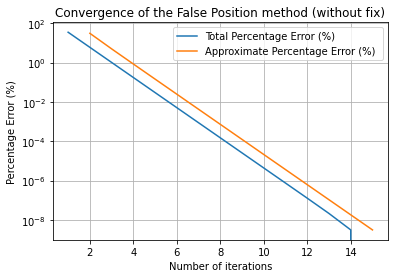

In [32]:
#False position method (without fix)
fig, ax = plt.subplots()
ax.plot(iteration_space_fpm_no_fix,et_results_fpm_no_fix,label='Total Percentage Error (%) ') #plotting the curve of the total error (%)
ax.plot(iteration_space_fpm_no_fix[1:], ea_results_fpm_no_fix[1:],label='Approximate Percentage Error (%) ') #plotting the curve of the total error (%)
#Note: the approximate error makes sense only after two approximations.
ax.set(xlabel='Number of iterations', ylabel='Percentage Error (%)')#Labels of axis
ax.set_yscale('log') #Log scale
ax.set_title('Convergence of the False Position method (without fix)') #Title
ax.legend() #show legend
ax.grid()
plt.show()

__We see that the false position method (without fix) converges linearly in a semi-log plot. This is to be expected because as we've stated before errors in the false position method fall as $\epsilon_{n+1}=k\epsilon_{n}^{1.618}$. In the next graph, we compare how all methods that we used converge.__

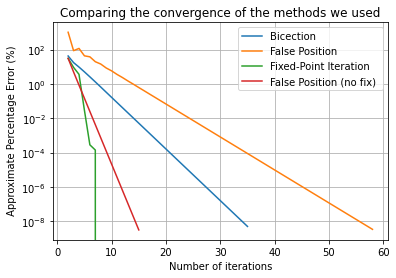

In [33]:
fig, ax = plt.subplots()
ax.plot(iteration_space_bice[1:], ea_results_bice[1:],label='Bicection') #plotting the curve of the approximate error (%) for the Bisection Method
ax.plot(iteration_space_fpi[1:], ea_results_fpi[1:],label='False Position')  #plotting the curve of the approximate error (%) for the
#False Position Method
ax.plot(iteration_space_fpm[1:], ea_results_fpm[1:],label='Fixed-Point Iteration') #plotting the curve of the approximate error (%) for the
#Note: the approximate error makes sense only after two approximations.
ax.plot(iteration_space_fpm_no_fix[1:], ea_results_fpm_no_fix[1:],label='False Position (no fix) ') #plotting the curve of the approximate error (%) for the
#False Position Method (without a fix)
ax.plot()
ax.set(xlabel='Number of iterations', ylabel=' Approximate Percentage Error (%)')#Labels of axises
ax.set_yscale('log') #Log scale
ax.set_title('Comparing the convergence of the methods we used') #Title
ax.legend() #show legend
ax.grid()
plt.show()

Looking at the graph above we can see that __the false position method when we don't use the fix, still is faster than the fixed-point iteration and the bisection method. This is expected since the errors of both latter methods are reduced linearly. Finally, we see that the fix has made the method converge a lot quicker, thus it's always recommended to use it. What isn't expected is that when the fix is used, the false position method converges slower until the first fix is applied. It could be that when the fix was first applied in iteration number two, it had the opposite effect where it made the next iteration worse than what it would have been, but it helped the method move along overall in iteration number three.__